In [3]:
import sys
print("System Version")
print(sys.version)

System Version
3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [4]:
os.getcwd()
## Getting and setting the current directory as working directory
# os.chdir(os.getcwd())

'/home/ubuntu/users/mohit/Embedding/SentAnalysis'

#### Skip to the Checkpoint:<a class="anchor" id="checkpoints"></a>
* [Checkpoint_1](#check1)
* [Checkpoint_2](#check2)
* [Checkpoint_3](#check3)
* [Checkpoint_4](#check4)

![](http://paxcom.net/wp-content/uploads/2016/09/Words.png)

# Sentiment Analysis  
  
Data can be downloaded from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip).  

The data is present in a CSV with emoticons removed. This file contains 6 fields:  
1. **Polarity** of the tweet (0 = negative, 2 = neutral, 4 = positive)
2. **ID** of the tweet (2087)
3. **Date** of the tweet (Sat May 16 23:58:44 UTC 2009)
4. **Query (lyx)** If there is no query, then this value is NO_QUERY.
5. **User** that tweeted (robotickilldozr)
6. **Text** of the tweet (Lyx is cool)


![](https://gridakl.com/wp-content/uploads/2018/03/main-qimg-8c1c4d5447ad8429e847b2c7aa9f7246.png)

![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]
[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

<img src="http://newsroom.unl.edu/announce/files/file36649.jpg" alt="IMAGE ALT TEXT HERE" width="100" height="100" border="10" />

<h2><img src="https://journals.aom.org/pb-assets/images/icons/DElogoAMJ.png" alt="roundtoc" style="float:left;width:40px;height:40px;"> Table Of Content:<a class="anchor" id="TOC"></a></h2>
[Configuration Block](#H0)  
(([Checkpoint 1](#check1)))
1. [Importing the Libraries](#H1)  
2. [Importing the Data](#H2)  
3. [Understanding the Data](#H3)  
4. [Data Preprocessing](#H4)  
    a. [Removing unecessary Variables](#H4a)  
    b. [Changing the Class Name](#H4b)  
    c. [Adding New Variable](#H4c)  
    d. [Cleaning the text](#H4d)  
    e. [Saving Cleaned Data as tsv](#H4e)  
(([Checkpoint 2](#check2)))
5. [Data Exploration and Visualization](#H5)  
6. [Model Development](#H6)
<img src="http://newsroom.unl.edu/announce/files/file36649.jpg" alt="TOC" style="float:right;width:100px;height:100px;">



<h2><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTPskj1g-Ri8Bb5tiVKNaJtGjM4nKFZ84SaHM78R2amyGwL3Ok" alt="roundtoc" style="float:left;width:40px;height:40px;">   <b>Configuration Block</b><a class="anchor" id="H0"></a></h2>
[Go to TOC](#TOC)

In [5]:
config = {
    'input_dir': 'inputs/',
    'training_file': 'training.1600000.processed.noemoticon.csv',
    'test_file':'testdata.manual.2009.06.14.csv',
    'training_file_cleaned': 'CleanedTrainingData.csv',
    'test_file_cleaned': 'CleanedTestData.csv'
#     'FileLocalSavingName':"DataClustering.csv",

#     'DimensionalityTransformationAlgo':['PCA', 'ICA'],

#     'bq_env': {'edit_query': 'Yes', 
#                'bq_query_template_file': 'QueryTemplateClustering.txt', 
#                'sid': ['1071'] ,
#                'date': ['010218'],
#                'MaxNoObsToGet': '1000000'},

#     'Trial':["ABC","DEF","GHI"],
}

In [6]:
# for i in dict.keys():
#     for j in dict[i]:
#         print(i, "    ", j, "   ",dict[i][0])

# from datetime import date, timedelta
# CurrentDate = date((2000 + int(TableDate[0][4:6])), int(TableDate[0][2:4]),int(TableDate[0][0:2])) 
# format = "%d%m%y"   #"%a %b %d %H:%M:%S %Y"
# TablesToCheck = [(CurrentDate + timedelta(days=i)).strftime(format) for i in range(int(TableWindow))]
# TablesToCheck

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;1. Importing the Libraries</b><a class="anchor" id="H1"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [7]:
import time
# start_time = time.time()

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
plt.style.use('fivethirtyeight')
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# HeadingBreaker = "======================================================================================\n"
# SubHeadingBreaker = "--------------------------------------------------------------------------------------\n"
# NotebookProcessCatalog = "Process Followed Log\n" + HeadingBreaker
# end_time = time.time()
# print('Time taken {:.4f} s'.format(end_time - start_time))

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 1 Reached</b><a class="anchor" id="check1"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)  
Progress until this point will be saved as Checkpoint1(reached) further to this checkpoint2 start

In [8]:
WorkspaceBasedCheckPt(1, True)
ChPt = 2

Congrats, on reaching a new checkpoint, saving it.


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;2. Importing the Data</b><a class="anchor" id="H2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [9]:
if WorkspaceBasedCheckPt(ChPt):
    
    from subprocess import check_output
    # print("CSV Files present in the directory:", check_output(["ls", "*.csv"]).decode("utf8")) #../input
    print("CSV Files present in the directory:\n", '\n'.join(glob.glob(config['input_dir'] + '*.{}'.format('csv')))) #../input

Running this cell
CSV Files present in the directory:
 inputs/training.1600000.processed.noemoticon.csv
inputs/testdata.manual.2009.06.14.csv
inputs/CleanedTrainingData.csv
inputs/CleanedTestData.csv


In [10]:
if WorkspaceBasedCheckPt(ChPt):
    
    cols = ['sentiment_class','id','date','query_string','user','text']
    train_DF = pd.read_csv(config['input_dir'] + config['training_file'], encoding="ISO-8859-1", header=None, names=cols)
    test_DF = pd.read_csv(config['input_dir'] + config['test_file'], encoding="ISO-8859-1", header=None, names=cols)
    print("Train Dataset Shape :", train_DF.shape)
    print("Test Dataset Shape :", test_DF.shape)
    display(train_DF.head())

Running this cell
Train Dataset Shape : (1600000, 6)
Test Dataset Shape : (498, 6)


,sentiment_class,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;3. Understanding the Data</b><a class="anchor" id="H3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [11]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of Train dataset")
    print("Train Dataset Shape :", train_DF.shape)
    VarDataType_DF = pd.DataFrame(train_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(train_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in train_DF.columns], '#OfUniqueValue': [len(train_DF[col].unique()) for col in train_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = train_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Running this cell
Observing the structure of Train dataset
Train Dataset Shape : (1600000, 6)


,VariableName,DataType,#OfMissingObs,#OfUniqueValue,count,mean,std,min,25%,50%,75%,max
0,sentiment_class,int64,0,2,1.6e+06,2,2,0,0,2,4,4
1,id,int64,0,1598315,1.6e+06,1.99882e+09,1.93576e+08,1.46781e+09,1.95692e+09,2.0021e+09,2.17706e+09,2.32921e+09
2,date,object,0,774363,-,-,-,-,-,-,-,-
3,query_string,object,0,1,-,-,-,-,-,-,-,-
4,user,object,0,659775,-,-,-,-,-,-,-,-
5,text,object,0,1581466,-,-,-,-,-,-,-,-


In [12]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of Test dataset")
    print("Test Dataset Shape :", test_DF.shape)
    VarDataType_DF = pd.DataFrame(test_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(test_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in test_DF.columns], '#OfUniqueValue': [len(test_DF[col].unique()) for col in test_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = test_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Running this cell
Observing the structure of Test dataset
Test Dataset Shape : (498, 6)


,VariableName,DataType,#OfMissingObs,count,mean,std,min,25%,50%,75%,max
0,sentiment_class,int64,0,498,2.02008,1.69969,0,0,2,4,4
1,id,int64,0,498,1867.23,2834.89,3,388.25,1013.5,2366.75,14076
2,date,object,0,-,-,-,-,-,-,-,-
3,query_string,object,0,-,-,-,-,-,-,-,-
4,user,object,0,-,-,-,-,-,-,-,-
5,text,object,0,-,-,-,-,-,-,-,-


In [13]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Printing top 10 obs/class in each object variable in Trainset")
    for VarName in train_DF.columns:
        if (train_DF[VarName].dtypes == object):
            print("\n***********************************************************************")
            print("\nAnalyzing the Variable:", VarName)
            print("Variable datatype:", train_DF[VarName].dtypes)
    #         print("Missing Values:", train_DF[VarName].isnull().sum())
    #         print(TrainDF[VarName].describe())
            display(pd.DataFrame(train_DF[VarName].value_counts()).reset_index().rename(columns = {'index' : 'Value', VarName : 'Frequency'}).head(10))

    #     if ((TrainDF[VarName].dtypes == float) | (TrainDF[VarName].dtypes == int)):
    #         print(pd.DataFrame(TrainDF[VarName].describe()).reset_index().rename(columns = {'index' : 'Property'}))
    #         print(TrainDF[VarName].value_counts()    

Running this cell
Printing top 10 obs/class in each object variable in Trainset

***********************************************************************

Analyzing the Variable: date
Variable datatype: object


,Value,Frequency
0,Mon Jun 15 12:53:14 PDT 2009,20
1,Mon Jun 15 13:39:50 PDT 2009,17
2,Fri May 29 13:40:04 PDT 2009,17
3,Fri May 22 05:10:17 PDT 2009,17
4,Fri Jun 05 14:13:07 PDT 2009,16
5,Fri Jun 05 11:05:33 PDT 2009,16
6,Fri May 29 10:09:34 PDT 2009,15
7,Fri Jun 05 09:45:09 PDT 2009,15
8,Sat Jun 06 11:59:49 PDT 2009,15
9,Fri Jun 05 14:17:04 PDT 2009,15



***********************************************************************

Analyzing the Variable: query_string
Variable datatype: object


,Value,Frequency
0,NO_QUERY,1600000



***********************************************************************

Analyzing the Variable: user
Variable datatype: object


,Value,Frequency
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236



***********************************************************************

Analyzing the Variable: text
Variable datatype: object


,Value,Frequency
0,isPlayer Has Died! Sorry,210
1,good morning,118
2,headache,115
3,Good morning,112
4,Headache,106
5,"Not to worry, noone got that one. Next questio...",86
6,"cant afford to see Angels and Demons, so i wa...",86
7,Goodnight,85
8,my tummy hurts,81
9,"Jogging, isnt REALLY that cool, especially if ...",80


In [14]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Printing top 10 obs/class in each object variable in Trainset")
    for VarName in test_DF.columns:
        if (test_DF[VarName].dtypes == object):
            print("\n***********************************************************************")
            print("\nAnalyzing the Variable:", VarName)
            print("Variable datatype:", test_DF[VarName].dtypes)
    #         print("Missing Values:", test_DF[VarName].isnull().sum())
    #         print(test_DF[VarName].describe())
            display(pd.DataFrame(test_DF[VarName].value_counts()).reset_index().rename(columns = {'index' : 'Value', VarName : 'Frequency'}).head(10))

    #     if ((test_DF[VarName].dtypes == float) | (test_DF[VarName].dtypes == int)):
    #         print(pd.DataFrame(test_DF[VarName].describe()).reset_index().rename(columns = {'index' : 'Property'}))
    #         print(test_DF[VarName].value_counts()    

Running this cell
Printing top 10 obs/class in each object variable in Trainset

***********************************************************************

Analyzing the Variable: date
Variable datatype: object


,Value,Frequency
0,Sun Jun 07 21:47:33 UTC 2009,1
1,Sun Jun 14 04:35:33 UTC 2009,1
2,Tue Jun 02 03:32:33 UTC 2009,1
3,Mon May 25 17:26:50 UTC 2009,1
4,Tue Jun 02 03:34:50 UTC 2009,1
5,Sun May 31 06:51:34 UTC 2009,1
6,Sun May 17 17:29:50 UTC 2009,1
7,Tue Jun 02 02:55:39 UTC 2009,1
8,Wed May 20 02:38:17 UTC 2009,1
9,Mon May 25 17:19:05 UTC 2009,1



***********************************************************************

Analyzing the Variable: query_string
Variable datatype: object


,Value,Frequency
0,time warner,35
1,"""night at the museum""",25
2,nike,25
3,gm,22
4,safeway,20
5,kindle2,20
6,lebron,18
7,dentist,17
8,jquery,16
9,at&t,15



***********************************************************************

Analyzing the Variable: user
Variable datatype: object


,Value,Frequency
0,vmkobs,3
1,tradecruz,2
2,souleaterjh,2
3,SimpleManJess,2
4,cfbloggers,2
5,mobileadgirl,2
6,MamiYessi,2
7,tpryan,1
8,windhamgirl,1
9,fwhamm,1



***********************************************************************

Analyzing the Variable: text
Variable datatype: object


,Value,Frequency
0,"@ludajuice Lebron is a Beast, but I'm still ch...",1
1,Colin Powell rocked yesterday on CBS. Cheney n...,1
2,@defsounds WTF is the point of deleting tweets...,1
3,is being fucked by time warner cable. didnt kn...,1
4,Climate focus turns to Beijing: The United Nat...,1
5,#jobs #sittercity Help with taking care of sic...,1
6,"'Next time, I'll call myself Nike'",1
7,I saw Night at the Museum: Battle of the Swith...,1
8,"@faithbabywear Ooooh, what model are you getti...",1
9,@springsingfiend @dvyers @sethdaggett @jlshack...,1


Our reponse variable is "sentiment_class" so let's observe the content with its class

In [15]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))

Running this cell


,Sentiment_Class_Value,Frequency
0,4,800000
1,0,800000


In [16]:
if WorkspaceBasedCheckPt(ChPt):
    
    pd.set_option('display.height', 10000)
    pd.set_option('display.max_colwidth', 180)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 200)
    pd.set_option('display.max_columns', 500)
    display(train_DF.loc[train_DF["sentiment_class"] == 0].head(10))

Running this cell


,sentiment_class,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [17]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF["sentiment_class"] == 4].head(10))

Running this cell


,sentiment_class,id,date,query_string,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
800005,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just burst out laughing really loud because of that Thanks for making me come out of my sulk!
800006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad already find this answer
800007,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!"
800008,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally joining twitter"
800009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me type. Forgive errors


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;4. Data Preprocessing</b><a class="anchor" id="H4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

### 4.1. Removing unecessary Variables <a class="anchor" id="H4a">

In [18]:
if WorkspaceBasedCheckPt(ChPt):
    
    # del()
    ## To Trainset
    train_DF.drop(['id','date','query_string','user'],axis=1,inplace=True)
    ## To Testset
    test_DF.drop(['id','date','query_string','user'],axis=1,inplace=True)

Running this cell


In [19]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Trainset Shape:", train_DF.shape)
    print("Trainset Shape:", test_DF.shape)

Running this cell
Trainset Shape: (1600000, 2)
Trainset Shape: (498, 2)


### 4.2. Changing the Class Name <a class="anchor" id="H4b">

In [20]:
## For Testset maintaining only those observation whose class are present in Trainset
test_DF = test_DF.loc[[elem in [0,4] for elem in test_DF['sentiment_class']]].reset_index(drop=True)

In [21]:
if WorkspaceBasedCheckPt(ChPt):
    
    ## To Trainset
    train_DF['sentiment_class'] = train_DF['sentiment_class'].map({0: 0, 4: 1})
    ## To Testset
    test_DF['sentiment_class'] = test_DF['sentiment_class'].map({0: 0, 4: 1})
    display(train_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))

Running this cell


,Sentiment_Class_Value,Frequency
0,1,800000
1,0,800000


### 4.3. Adding New Variable <a class="anchor" id="H4c">

In [22]:
if WorkspaceBasedCheckPt(ChPt):
    
    ## To Trainset
    train_DF['pre_clean_len_text'] = [len(le) for le in train_DF.text]
    ## To Testset
    test_DF['pre_clean_len_text'] = [len(le) for le in test_DF.text]
    print("Updated Shape", train_DF.shape)
    display(train_DF.head())

Running this cell
Updated Shape (1600000, 3)


,sentiment_class,text,pre_clean_len_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111


Running this cell


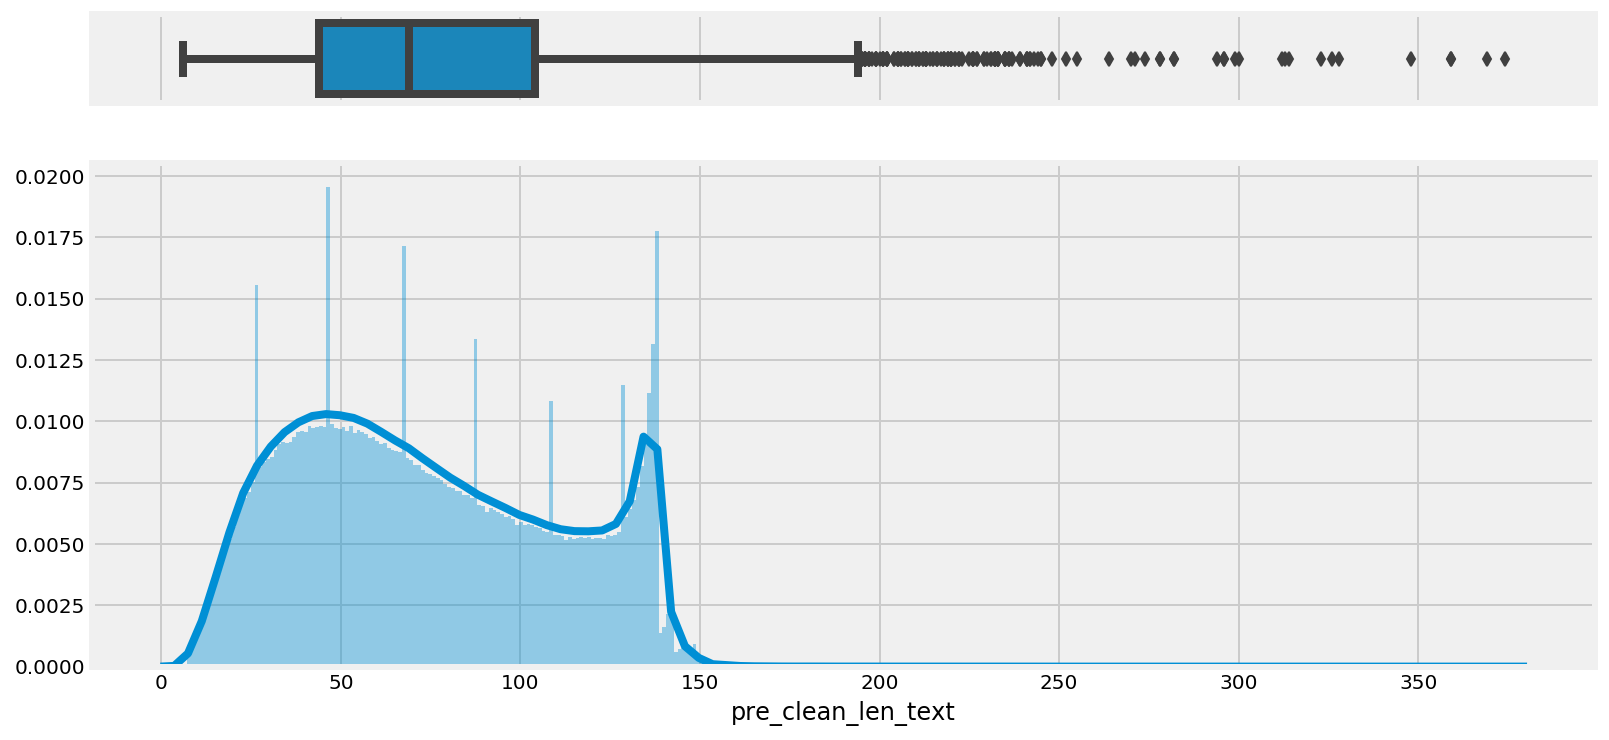

In [23]:
if WorkspaceBasedCheckPt(ChPt):
    
    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(train_DF['pre_clean_len_text'], ax=ax_box)
    sns.distplot(train_DF['pre_clean_len_text'], ax=ax_hist, bins = 350)
    ax_box.set(xlabel='')

In [24]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF['pre_clean_len_text'] > 140].head())

Running this cell


,sentiment_class,text,pre_clean_len_text
213,0,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers,141
279,0,Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly.,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down,145
400,0,"#3 woke up and was having an accident - &quot;It's pushing, it's pushing!&quot; he was crying because he couldn't stop from wetting his pants.",144


### 4.4. Cleaning the text <a class="anchor" id="H4d">

#### 4.4.1.1. Cleaning the @user

In [25]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][343])

Running this cell


'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [26]:
if WorkspaceBasedCheckPt(ChPt):
    
    import re
    display(re.sub(r'@[A-Za-z0-9_]+','',train_DF['text'][343]))
    # [word for word in train_DF['text'][343].split(' ') if word[0] != '@']

Running this cell


' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

#### 4.4.1.2. HTML decoding

In [27]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][343])

Running this cell


'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [28]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bs4 import BeautifulSoup
    example1 = BeautifulSoup(train_DF['text'][343], 'lxml')
    display(example1.get_text())

Running this cell


'@TheLeagueSF Not Fun & Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted & clamped down '

#### 4.4.1.3. Cleaning the other encoding

In [29]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][226])

Running this cell


'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [30]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][226].encode("utf-8-sig"))#.decode('utf-8-sig') #.decode('utf_8')

Running this cell


b'\xef\xbb\xbfTuesday\xc3\xaf\xc2\xbf\xc2\xbdll start with reflection \xc3\xaf\xc2\xbf\xc2\xbdn then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [31]:
if WorkspaceBasedCheckPt(ChPt):
    
    # train_DF['text'][226].replace(u"ï¿½", "?")
    display(re.sub('ï¿½[A-Za-z0-9]+ ', ' ?? ',train_DF['text'][226]))

Running this cell


'Tuesday ?? start with reflection  ?? then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

#### 4.4.1.4. Links

In [32]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][50])

Running this cell


"Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via www.diigo.com/~tautao Still waiting for broadband we are "

<img src="https://cdn.tutsplus.com/net/uploads/legacy/404_regularExpressions/images/url.jpg" alt="roundtoc" style="float:left;width:150px;height:150px;">

In [33]:
if WorkspaceBasedCheckPt(ChPt):
    
    # ^ matches position just before the first character of the string
    # $ matches position just after the last character of the string
    # . matches a single character. Does not matter what character it is, except newline
    # * matches preceding match zero or more times
    # re.sub('https?://[A-Za-z0-9./]+ ', '',train_DF['text'][50])
    display(re.sub('https?://[^ ]+', '',train_DF['text'][50]))

Running this cell


"Broadband plan 'a massive broken promise'  via www.diigo.com/~tautao Still waiting for broadband we are "

In [34]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(re.sub('www.[^ ]+', '',train_DF['text'][50]))

Running this cell


"Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via  Still waiting for broadband we are "

#### 4.4.1.5. Changing word Formats

In [35]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[175].lower())

Running this cell


"@machineplay i'm so sorry you're having to go through this. again.  #therapyfail"

In [36]:
if WorkspaceBasedCheckPt(ChPt):
    
    negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                    "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                    "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                    "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                    "mustn't":"must not", "i'm":"i am"}
    neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

    display(neg_pattern.sub(lambda x: negations_dic[x.group()], train_DF.text[175].lower()))

Running this cell


"@machineplay i am so sorry you're having to go through this. again.  #therapyfail"

#### 4.4.1.6. Removing Characters except text

In [37]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[175])

Running this cell


"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [38]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(re.sub('[^a-zA-Z]', ' ', train_DF.text[175]))

Running this cell


' machineplay I m so sorry you re having to go through this  Again    therapyfail'

### 4.4.2. Defining Data Cleaning Function

Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorize

In [39]:
if WorkspaceBasedCheckPt(ChPt):
    
    import re
    from bs4 import BeautifulSoup
    from nltk.tokenize import WordPunctTokenizer
    tok = WordPunctTokenizer()

    user_pat = r'@[A-Za-z0-9_]+'
    # combined_pat = r'|'.join((pat1, pat2))
    decode_pat = r'ï¿½[A-Za-z0-9]+ '
    http_pat = r'https?://[^ ]+'
    www_pat = r'www.[^ ]+'
    negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                    "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                    "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                    "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                    "mustn't":"must not", "i'm":"i am", "you're": "you are", "we're": "we are", 
                     "i've": "i have", "i'll": "i will", "ill": "i will", "cant":"can not", "dont":"do not"}
    neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

    def TweetTextCleaner(text):
        soup = BeautifulSoup(text, 'lxml')
        TextInClean = soup.get_text()
        TextInClean = re.sub(user_pat, ' ', TextInClean)
        TextInClean = re.sub(decode_pat, ' ', TextInClean)
        TextInClean = re.sub(http_pat, ' ', TextInClean)
        TextInClean = re.sub(www_pat, ' ', TextInClean)
        TextInClean = TextInClean.lower()
        TextInClean = neg_pattern.sub(lambda x: negations_dic[x.group()], TextInClean)
        ## adding some extra cases
        TextInClean = TextInClean.replace("&", "and")
        TextInClean = TextInClean.replace("i", "iii")
        ## removing single characters also
        TextInClean = re.sub('[^a-zA-Z]', ' ', TextInClean)
        ## tokenizing and joining together to remove unneccessary white spaces
        TextInClean = [x for x  in tok.tokenize(TextInClean) if len(x) > 1]
        ## Combining it back
        TextInClean = (' '.join(TextInClean))
        TextInClean = TextInClean.replace("iii", "i")
        return TextInClean

Running this cell


#### Testing the Function
Testing on the cases mentioned above.

In [40]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[[0, 50, 175, 226, 343]])

Running this cell


0                                    @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
50                     Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via www.diigo.com/~tautao Still waiting for broadband we are 
175                                                                     @machineplay I'm so sorry you're having to go through this. Again.  #therapyfail
226        Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 
343    @TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 
Name: text, dtype: object

In [41]:
if WorkspaceBasedCheckPt(ChPt):
    
    display([TweetTextCleaner(text) for text in train_DF.text[[0, 50, 175, 226, 343]]])

Running this cell


['awww that bummer you shoulda got david carr of third day to do it',
 'broadband plan massive broken promise via still waiting for broadband we are',
 'i am so sorry you are having to go through this again therapyfail',
 'tuesday start with reflection then lecture in stress reducing techniques that sure might become very useful for us accompaniers',
 'not fun and furious the new mantra for the bay breakers it was getting rambunctious the city overreacted and clamped down']

Testing on some more cases.

In [42]:
if WorkspaceBasedCheckPt(ChPt):
    
    testing = train_DF.text[:50]
    display([TweetTextCleaner(text) for text in testing])

Running this cell


['awww that bummer you shoulda got david carr of third day to do it',
 'is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all i am mad why am i here because i can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol i am fine thanks how you',
 'nope they did not have it',
 'que me muera',
 'spring break in plain city it snowing',
 'i just re pierced my ears',
 'i could not bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i did not have gun not really though zac snyder just doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt me severely to wat

#### 4.4.3. Cleaning the Dataset

##### Trainset

In [43]:
%%time
if WorkspaceBasedCheckPt(ChPt):
    
    print("Cleaning and parsing the tweets...\n")
    Cleaned_Text = []
    for i in range(0, train_DF.shape[0], int(train_DF.shape[0] * 0.01)):
        start_time = time.time()
        for obs in range(i, (i+int(train_DF.shape[0] * 0.01))):
            Cleaned_Text.append(TweetTextCleaner(train_DF['text'][obs]))
        end_time = time.time()
        print("[{}% Completed, Time Taken {}sec] Tweets {} to {} of the total {} has been processed. ".format(int(i/int(train_DF.shape[0] * 0.01)) + 1, int(end_time - start_time), i, i+int(train_DF.shape[0] * 0.01), train_DF.shape[0]))
    
    print("Checking Final Length of the Cleaned Text ", len(Cleaned_Text))

Running this cell
Cleaning and parsing the tweets...

[1% Completed, Time Taken 5sec] Tweets 0 to 16000 of the total 1600000 has been processed. 
[2% Completed, Time Taken 5sec] Tweets 16000 to 32000 of the total 1600000 has been processed. 
[3% Completed, Time Taken 5sec] Tweets 32000 to 48000 of the total 1600000 has been processed. 
[4% Completed, Time Taken 5sec] Tweets 48000 to 64000 of the total 1600000 has been processed. 
[5% Completed, Time Taken 5sec] Tweets 64000 to 80000 of the total 1600000 has been processed. 
[6% Completed, Time Taken 5sec] Tweets 80000 to 96000 of the total 1600000 has been processed. 
[7% Completed, Time Taken 5sec] Tweets 96000 to 112000 of the total 1600000 has been processed. 
[8% Completed, Time Taken 5sec] Tweets 112000 to 128000 of the total 1600000 has been processed. 
[9% Completed, Time Taken 5sec] Tweets 128000 to 144000 of the total 1600000 has been processed. 
[10% Completed, Time Taken 5sec] Tweets 144000 to 160000 of the total 1600000 has

[84% Completed, Time Taken 5sec] Tweets 1328000 to 1344000 of the total 1600000 has been processed. 
[85% Completed, Time Taken 5sec] Tweets 1344000 to 1360000 of the total 1600000 has been processed. 
[86% Completed, Time Taken 5sec] Tweets 1360000 to 1376000 of the total 1600000 has been processed. 
[87% Completed, Time Taken 5sec] Tweets 1376000 to 1392000 of the total 1600000 has been processed. 
[88% Completed, Time Taken 5sec] Tweets 1392000 to 1408000 of the total 1600000 has been processed. 
[89% Completed, Time Taken 5sec] Tweets 1408000 to 1424000 of the total 1600000 has been processed. 
[90% Completed, Time Taken 5sec] Tweets 1424000 to 1440000 of the total 1600000 has been processed. 
[91% Completed, Time Taken 5sec] Tweets 1440000 to 1456000 of the total 1600000 has been processed. 
[92% Completed, Time Taken 5sec] Tweets 1456000 to 1472000 of the total 1600000 has been processed. 
[93% Completed, Time Taken 5sec] Tweets 1472000 to 1488000 of the total 1600000 has been pr

In [44]:
if WorkspaceBasedCheckPt(ChPt):
    
    train_DF['clean_text'] = Cleaned_Text
    train_DF['clean_len_text'] = [len(le) for le in train_DF.clean_text]
    print("Updated Shape", train_DF.shape)
    display(train_DF.head())

Running this cell
Updated Shape (1600000, 5)


,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115,awww that bummer you shoulda got david carr of third day to do it,65
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,is upset that he can not update his facebook by texting it and might cry as result school today also blah,105
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,i dived many times for the ball managed to save the rest go out of bounds,73
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,no it not behaving at all i am mad why am i here because i can not see you all over there,89


Running this cell


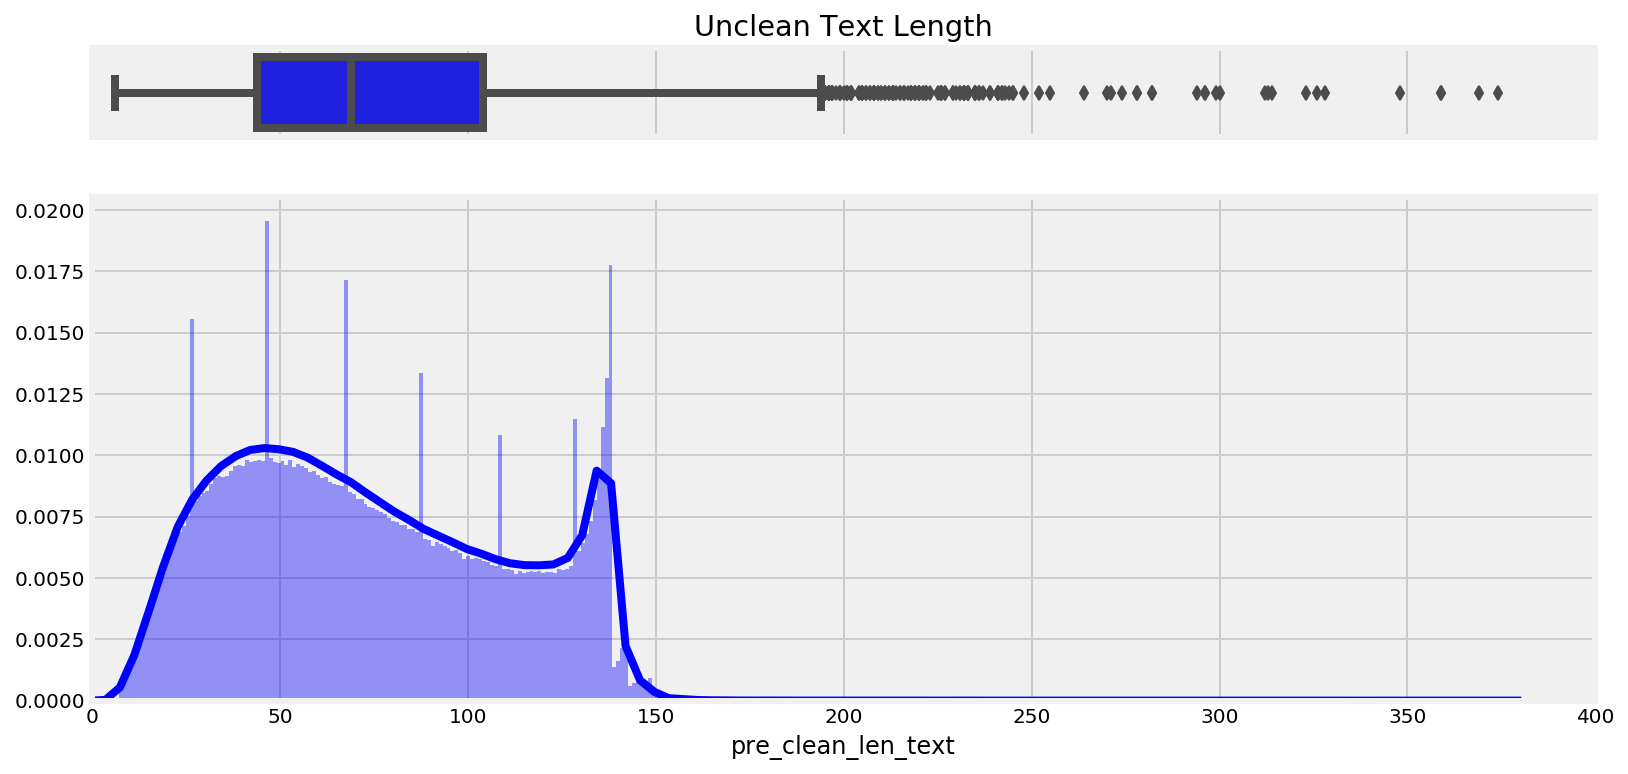

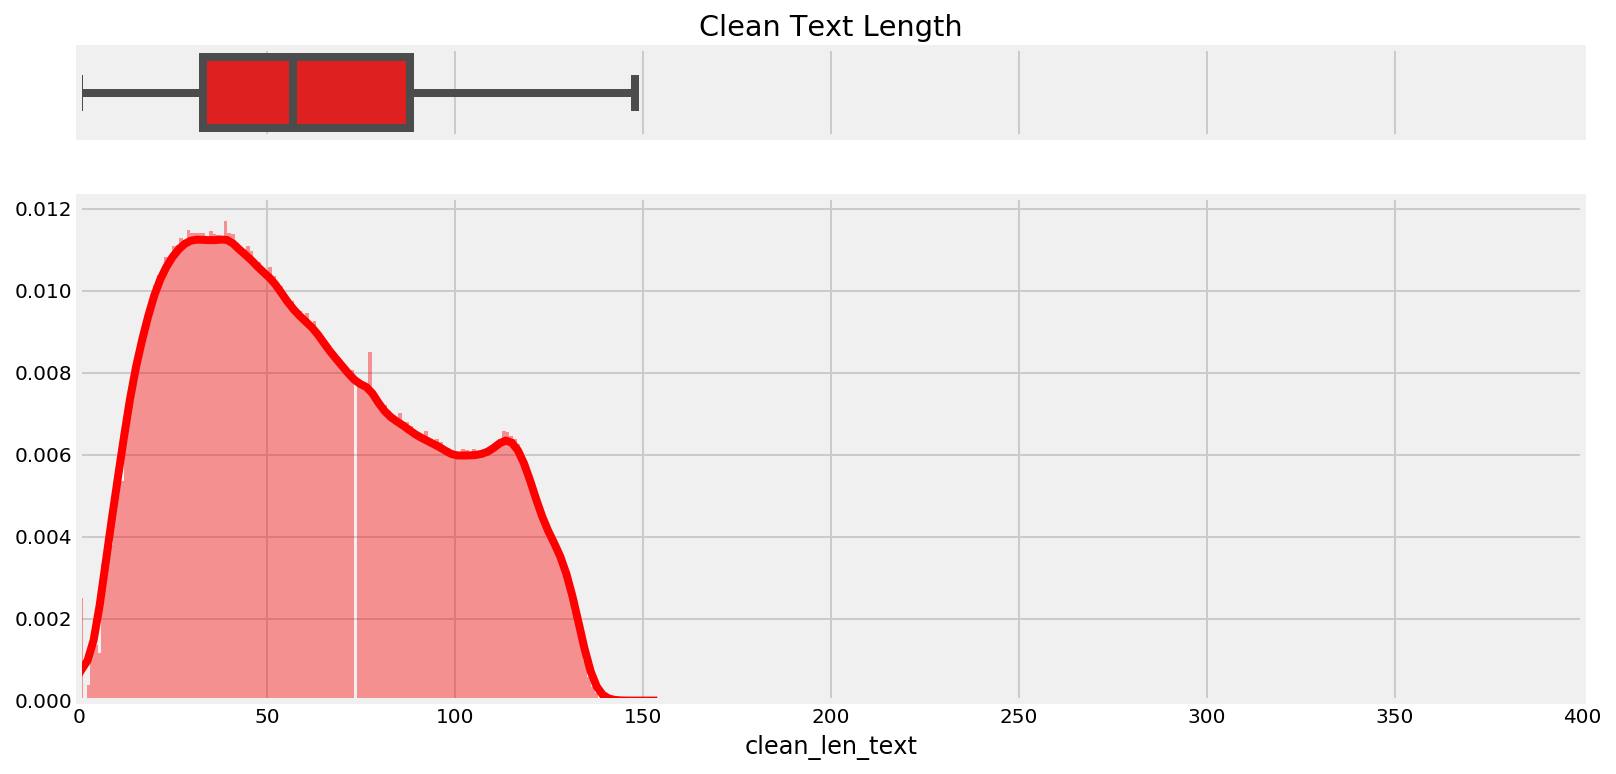

In [45]:
if WorkspaceBasedCheckPt(ChPt):
    
    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    PCLB = sns.boxplot(train_DF['pre_clean_len_text'], ax=ax_box, color = 'blue')
    PCLD = sns.distplot(train_DF['pre_clean_len_text'], ax=ax_hist, bins = 350, color = 'blue')
    PCLB.set_title("Unclean Text Length")
    PCLD.set(xlim=(0, 400))
    ax_box.set(xlabel='')

    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    CLB = sns.boxplot(train_DF['clean_len_text'], ax=ax_box, color = 'red')
    CLD = sns.distplot(train_DF['clean_len_text'], ax=ax_hist, bins = 150, color = 'red')
    CLB.set_title("Clean Text Length")
    CLD.set(xlim=(0, 400))
    ax_box.set(xlabel='')

In [46]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF['clean_len_text'] > 140].head())

Running this cell


,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
17005,0,I still like the kid I liked last year we liked each other but never dated.him&amp;his gf broke up&amp;I was so happy.but now there back together,146,i still like the kid i liked last year we liked each other but never dated himandhis gf broke upandi was so happy but now there back together,141
29960,0,"No puedo dormirme I'm watching prison break &amp; I'm sooo hungry &amp; thirsty, but don't wanna eat more, so I'm staying away from the kitchen.",145,no puedo dormirme i am watching prison break and i am sooo hungry and thirsty but do not wanna eat more so i am staying away from the kitchen,141
34608,0,I'm wondering why my profile pic doesn't show up on tweetie for mac and why it doesn't let me see who i'm following or my followers in it,138,i am wondering why my profile pic does not show up on tweetie for mac and why it does not let me see who i am following or my followers in it,141
36990,0,I went into the toilets at work &amp; it smelled like something large had died then something had crawled into that and died &amp; so on &amp; so on.,150,i went into the toilets at work and it smelled like something large had died then something had crawled into that and died and so on and so on,142
37465,0,"I ALWAYS tweet this, but i miss my internet! I'm so bored out of my mind. I dont wanna do hw &amp; i cant watch tv anymore bc I'm so behind.",141,i always tweet this but i miss my internet i am so bored out of my mind i do not wanna do hw and i can not watch tv anymore bc i am so behind,141


All of this is cause due to the expansion of the general words to their longer version 

##### Testset

In [47]:
%%time
if WorkspaceBasedCheckPt(ChPt):
    
    Cleaned_TestText = [TweetTextCleaner(obs) for obs in test_DF['text']]
    print("Total Number of Observations processed", len(Cleaned_TestText))

Running this cell
Total Number of Observations processed 359
CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 113 ms


In [48]:
if WorkspaceBasedCheckPt(ChPt):
    
    test_DF['clean_text'] = Cleaned_TestText
    test_DF['clean_len_text'] = [len(le) for le in test_DF.clean_text]
    print("Updated Shape", test_DF.shape)

Running this cell
Updated Shape (359, 5)


### 4.5. Saving Cleaned Data as tsv <a class="anchor" id="H4e">

In [49]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Dataset Shape:", train_DF.shape)
    display(train_DF.head())

Running this cell
Dataset Shape: (1600000, 5)


,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115,awww that bummer you shoulda got david carr of third day to do it,65
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,is upset that he can not update his facebook by texting it and might cry as result school today also blah,105
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,i dived many times for the ball managed to save the rest go out of bounds,73
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,no it not behaving at all i am mad why am i here because i can not see you all over there,89


In [50]:
if WorkspaceBasedCheckPt(ChPt):
    
    train_DF.to_csv(config['input_dir'] + config['training_file_cleaned'], sep='\t', index=False)
    test_DF.to_csv(config['input_dir'] + config['test_file_cleaned'], sep='\t', index=False)

Running this cell


#### Checking if file saved properly

In [51]:
if WorkspaceBasedCheckPt(ChPt):
    
    checkDF = pd.read_csv(config['input_dir'] + config['training_file_cleaned'], sep='\t')
    print("Dataset Shape: ", checkDF.shape)
    display(checkDF.head())

Running this cell
Dataset Shape:  (1600000, 5)


,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115,awww that bummer you shoulda got david carr of third day to do it,65
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,is upset that he can not update his facebook by texting it and might cry as result school today also blah,105
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,i dived many times for the ball managed to save the rest go out of bounds,73
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,46
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,no it not behaving at all i am mad why am i here because i can not see you all over there,89


In [52]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of saved Train dataset")
    print("Train Dataset Shape :", checkDF.shape)
    VarDataType_DF = pd.DataFrame(checkDF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(checkDF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in checkDF.columns], '#OfUniqueValue': [len(checkDF[col].unique()) for col in checkDF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = checkDF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Running this cell
Observing the structure of saved Train dataset
Train Dataset Shape : (1600000, 5)


,VariableName,DataType,#OfMissingObs,#OfUniqueValue,count,mean,std,min,25%,50%,75%,max
0,sentiment_class,int64,0,2,1.6e+06,0.5,0.5,0,0,0.5,1,1
1,text,object,0,1581466,-,-,-,-,-,-,-,-
2,pre_clean_len_text,int64,0,257,1.6e+06,74.0901,36.4411,6,44,69,104,374
3,clean_text,object,3948,1516265,-,-,-,-,-,-,-,-
4,clean_len_text,int64,0,147,1.6e+06,61.5263,33.8075,0,33,57,88,148


In [53]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(checkDF.loc[checkDF['clean_text'].isnull()].head(15))

Running this cell


,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
208,0,@mandayyy,10,NaN,0
249,0,@mandayyy,12,NaN,0
282,0,@ITS_NEMESIS -------,21,NaN,0
398,0,@danadearmond,14,NaN,0
430,0,@anistorm,10,NaN,0
1011,0,@citizensheep,14,NaN,0
1014,0,@GirlsGoneChild,16,NaN,0
1231,0,@thecoolestout,15,NaN,0
1421,0,@marlonjenglish,16,NaN,0
1486,0,@oishiieats,12,NaN,0


thing to note here is negative sentiment are associated when someperson has been tagged in general. Also we now have observed the reason for some clean text to be empty.

In [54]:
test_DF.head(15)

,sentiment_class,text,pre_clean_len_text,clean_text,clean_len_text
0,1,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.",111,i loooooooovvvvvveee my kindle not that the dx is cool but the is fantastic in its own right,92
1,1,Reading my kindle2... Love it... Lee childs is good read.,58,reading my kindle love it lee childs is good read,49
2,1,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!",58,ok first assesment of the kindle it fucking rocks,49
3,1,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :),140,you ll love your kindle i have had mine for few months and never looked back the new big one is huge no need for remorse,120
4,1,@mikefish Fair enough. But i have the Kindle2 and I think it's perfect :),75,fair enough but i have the kindle and i think it perfect,56
5,1,@richardebaker no. it is too big. I'm quite happy with the Kindle2.,67,no it is too big i am quite happy with the kindle,49
6,0,Fuck this economy. I hate aig and their non loan given asses.,61,fuck this economy i hate aig and their non loan given asses,59
7,1,Jquery is my new best friend.,29,jquery is my new best friend,28
8,1,Loves twitter,13,loves twitter,13
9,1,how can you not love Obama? he makes jokes about himself.,57,how can you not love obama he makes jokes about himself,55


In [55]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of saved Train dataset")
    print("Train Dataset Shape :", test_DF.shape)
    VarDataType_DF = pd.DataFrame(test_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(test_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in test_DF.columns], '#OfUniqueValue': [len(test_DF[col].unique()) for col in test_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = test_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Running this cell
Observing the structure of saved Train dataset
Train Dataset Shape : (359, 5)


,VariableName,DataType,#OfMissingObs,#OfUniqueValue,count,mean,std,min,25%,50%,75%,max
0,sentiment_class,int64,0,2,359,0.506964,0.500649,0,0,1,1,1
1,text,object,0,359,-,-,-,-,-,-,-,-
2,pre_clean_len_text,int64,0,122,359,83.468,36.4026,12,56.5,79,116.5,144
3,clean_text,object,0,359,-,-,-,-,-,-,-,-
4,clean_len_text,int64,0,119,359,70.546,33.8169,11,42,64,98,138


In [56]:
#### Test set is a combination of Positive Negative and neutral tweets while our training dataset just contain negative and positive sentiments

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 2 Reached</b><a class="anchor" id="check2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [57]:
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 3

Congrats, on reaching a new checkpoint, saving it.


In [58]:
### Ways to view defined variables
# globals()
# locals()
# dir()
# who

In [59]:
if WorkspaceBasedCheckPt(ChPt):
    ## Cleaning Workspace 
    del(CLB, CLD, PCLB, PCLD, Prop_DF, Uniq_DF, Miss_DF, VarDataType_DF, ax_hist, ax_box, VarName, TweetTextCleaner, Cleaned_Text, Cleaned_TestText, checkDF, decode_pat, example1, http_pat, neg_pattern, negations_dic, obs, testing, user_pat, www_pat)

Running this cell


In [60]:
%whos

Variable                Type                  Data/Info
-------------------------------------------------------
BeautifulSoup           type                  <class 'bs4.BeautifulSoup'>
ChPt                    int                   3
WordPunctTokenizer      ABCMeta               <class 'nltk.tokenize.regexp.WordPunctTokenizer'>
WorkspaceBasedCheckPt   function              <function WorkspaceBasedC<...>heckPt at 0x7f9294de6158>
check_output            function              <function check_output at 0x7f929ffd8048>
color                   _ColorPalette         [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
cols                    list                  n=6
config                  dict                  n=5
dill                    module                <module 'dill' from '/usr<...>ckages/dill/__init__.py'>
end_time                float                 1522773532.0425391
f                       Figure                Figure(864x432)
glob                    module                <mo

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;5.  Data Exploration and Visualization</b><a class="anchor" id="H5"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;**Text Visualization** 
  
### 5.1. Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.  
 

#### 5.1.1. Checking when sentiment class is 0/Negative

In [61]:
if WorkspaceBasedCheckPt(ChPt):
    string_list = train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0].tolist()
    SinglePooledString = " ".join(string_list)
    print("Type:", type(SinglePooledString))
    print("Length:", len(SinglePooledString))

Running this cell
Type: <class 'str'>
Length: 51696261


Running this cell


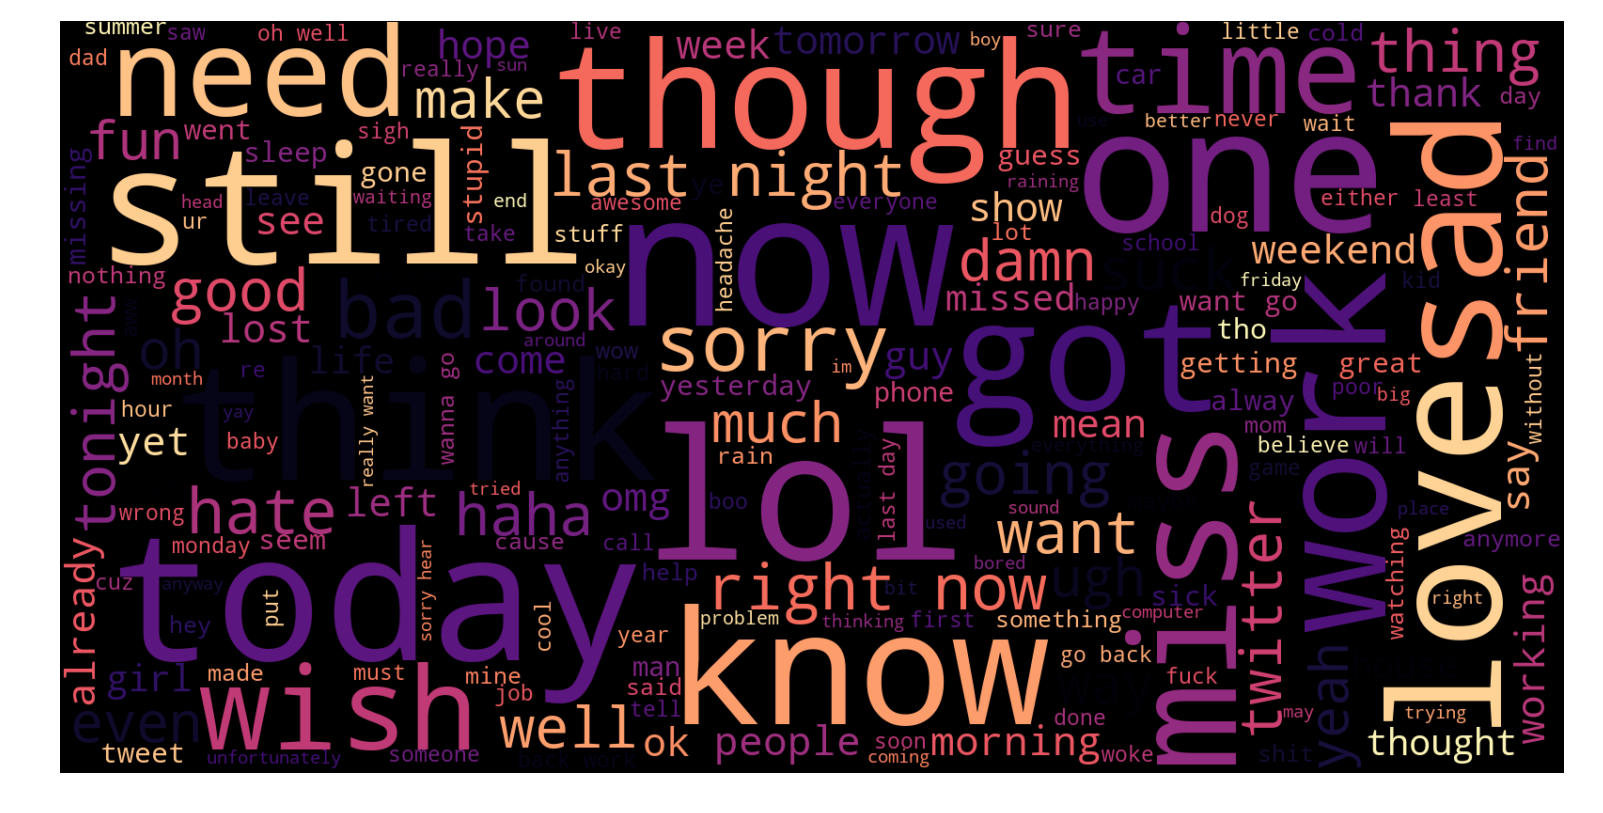

In [62]:
if WorkspaceBasedCheckPt(ChPt):
    from wordcloud import WordCloud

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(SinglePooledString)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [63]:
if WorkspaceBasedCheckPt(ChPt):
    
    [text for text in string_list if 'love' in text][0:15]

Running this cell


#### 5.1.2. Checking when sentiment class is 1/Positive

In [64]:
if WorkspaceBasedCheckPt(ChPt):
    
    string_list = train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1].tolist()
    SinglePooledString = " ".join(string_list)
    print("Type:", type(SinglePooledString))
    print("Length:", len(SinglePooledString))

Running this cell
Type: <class 'str'>
Length: 48345815


Running this cell


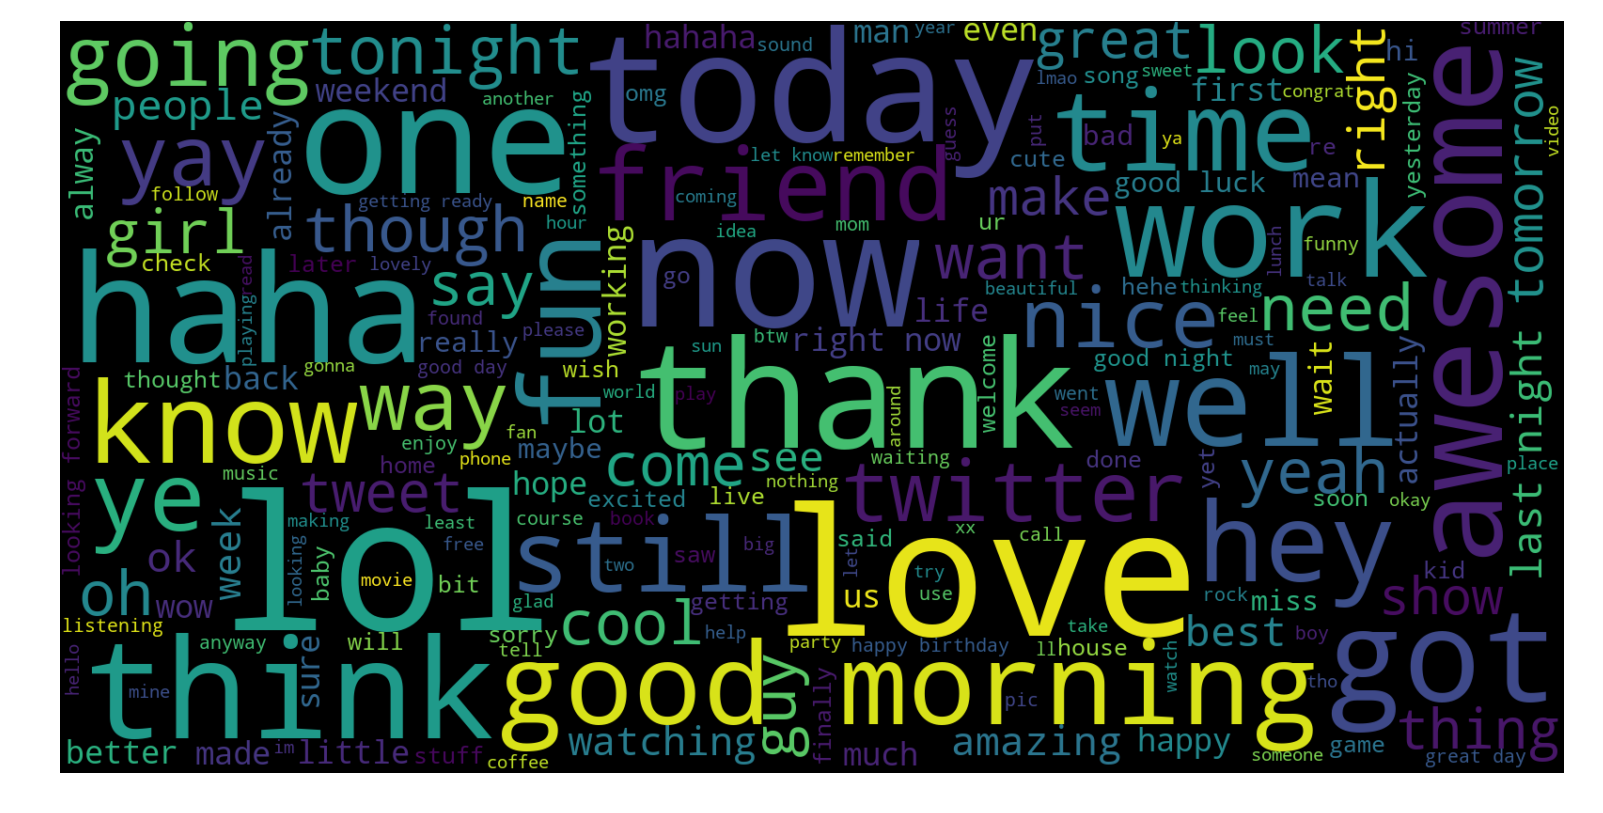

In [65]:
if WorkspaceBasedCheckPt(ChPt):
    
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(SinglePooledString)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [66]:
if WorkspaceBasedCheckPt(ChPt):
    ## Cleaning the Workspace
    del(string_list, SinglePooledString, wordcloud, WordCloud)

Running this cell


### 5.2. Computing Term Frequency for further Data Visualization

In [67]:
if WorkspaceBasedCheckPt(ChPt):
    from sklearn.feature_extraction.text import CountVectorizer
    CntVec = CountVectorizer()
    CntVec.fit(train_DF['clean_text'])

Running this cell


In [68]:
if WorkspaceBasedCheckPt(ChPt):
    len(CntVec.get_feature_names())

Running this cell


it looks like count vectorizer has extracted 267001 words out of the corpus

In [69]:
if WorkspaceBasedCheckPt(ChPt):
    NegativeDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0])
    PositiveDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1])
    print(type(NegativeDoc_matrix), NegativeDoc_matrix.shape)

    Negative_tf = np.sum(NegativeDoc_matrix,axis=0)
    Positive_tf = np.sum(PositiveDoc_matrix,axis=0)
    print(type(Negative_tf), Negative_tf.shape)

    Negative = np.squeeze(np.asarray(Negative_tf))
    Positive = np.squeeze(np.asarray(Positive_tf))
    print(type(Negative), Negative.shape)

    TermFreq_DF = pd.DataFrame([Negative,Positive], columns=CntVec.get_feature_names()).transpose()
    print(type(TermFreq_DF), TermFreq_DF.shape)

    TermFreq_DF.rename(columns = {0:'Negative', 1:'Positive'}, inplace= True)
    TermFreq_DF['TotalFreq'] = TermFreq_DF['Negative'] + TermFreq_DF['Positive']
    print('DataFrame Shape:', TermFreq_DF.shape)
    display(TermFreq_DF.sort_values(by='TotalFreq', ascending=False).head(15))

Running this cell
<class 'scipy.sparse.csr.csr_matrix'> (800000, 267001)
<class 'numpy.matrixlib.defmatrix.matrix'> (1, 267001)
<class 'numpy.ndarray'> (267001,)
<class 'pandas.core.frame.DataFrame'> (267001, 2)
DataFrame Shape: (267001, 3)


,Negative,Positive,TotalFreq
to,313161,252563,565724
the,257818,265969,523787
and,172781,171917,344698
not,219899,97564,317463
my,190753,125945,316698
it,157434,147769,305203
you,103827,198220,302047
is,133429,111191,244620
in,115530,101147,216677
for,98998,117369,216367


In [70]:
### Saving to CSV

### 5.3. Zipf's Law


Zipf's Law is first presented by French stenographer Jean-Baptiste Estoup and later named after the American linguist George Kingsley Zipf. Zipf's Law states that a small number of words are used all the time, while the vast majority are used very rarely. There is nothing surprising about this, we know that we use some of the words very frequently, such as "the", "of", etc, and we rarely use the words like "aardvark" (aardvark is an animal species native to Africa). However, what's interesting is that "given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc."

In other words, the rth most frequent word has a frequency f(r) that scales according to $${f(r)} \propto \frac{1}{r^\alpha}$$ for $$\alpha \approx {1}$$

Let's see how the tweet tokens and their frequencies look like on a plot.

In [71]:
if WorkspaceBasedCheckPt(ChPt):
    TermFreq_DF.sort_values(by='TotalFreq', ascending=False)['TotalFreq'][0]
    max(TermFreq_DF['TotalFreq'])

Running this cell


Running this cell


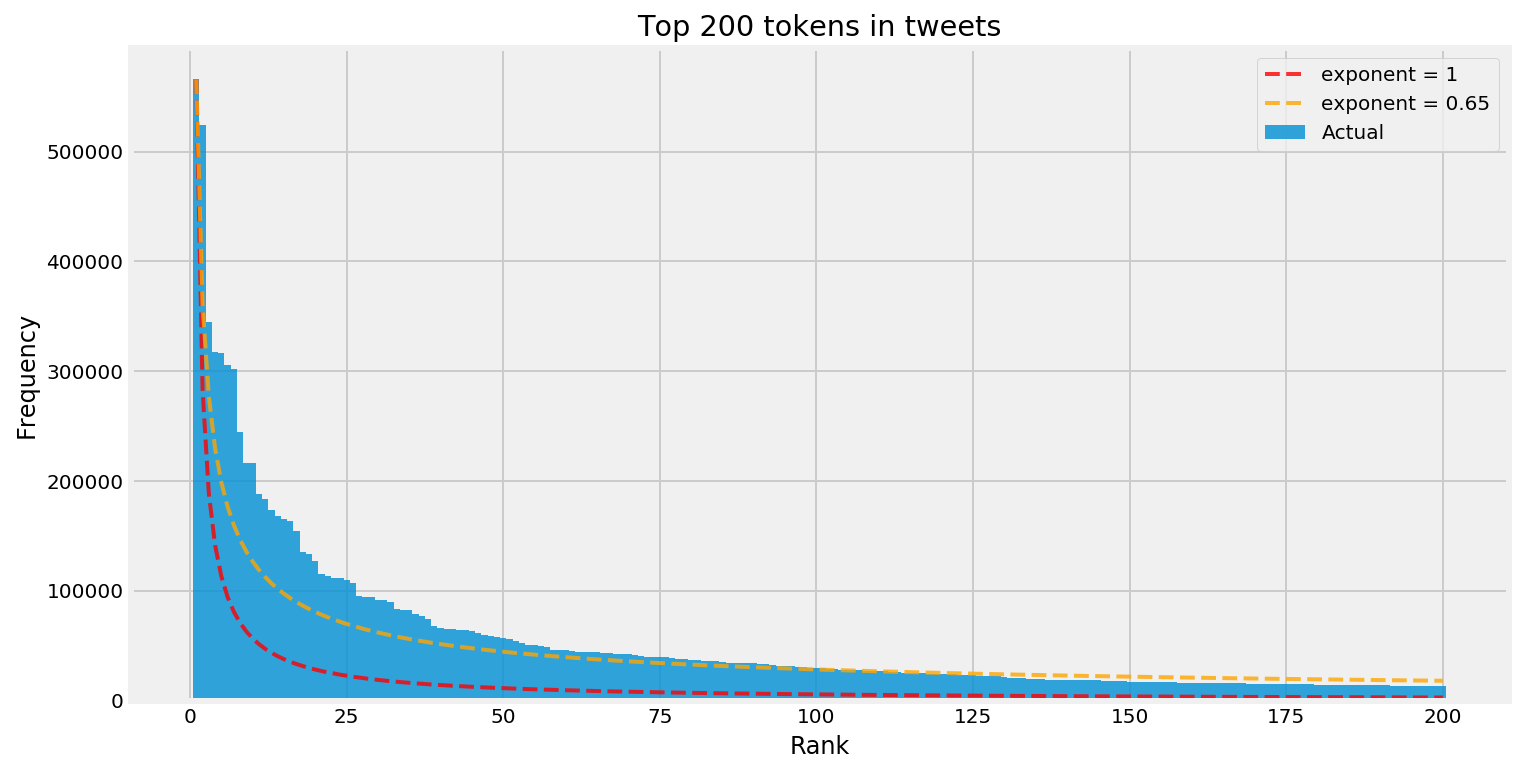

In [72]:
if WorkspaceBasedCheckPt(ChPt):
    TopRanksToView = 200
    exponent1 = 1
    exponent2 = 0.65

    plt.figure(figsize=(11,6))
    WordRank = np.arange(start = 1, stop = TopRanksToView + 1, step=1)
    ConstantOfProportionality = max(TermFreq_DF['TotalFreq'])
    Expected_Zipf1 = [np.around(ConstantOfProportionality*(1/r**exponent1), decimals=5) for r in WordRank]
    Expected_Zipf2 = [np.around(ConstantOfProportionality*(1/r**exponent2), decimals=5) for r in WordRank]
    plt.plot(WordRank, Expected_Zipf1, color= 'r', linestyle= '--', linewidth = 2, alpha= 0.8, label = "exponent = 1")
    plt.plot(WordRank, Expected_Zipf2, color= 'orange', linestyle= '--', linewidth = 2, alpha= 0.8, label = "exponent = 0.65")
    TextFreq = TermFreq_DF.sort_values(by='TotalFreq', ascending=False)['TotalFreq'][:TopRanksToView]
    plt.bar(WordRank, TextFreq, width = 1, align= 'center', alpha=0.8, label = "Actual")
    plt.ylabel('Frequency')
    plt.xlabel('Rank')
    plt.title('Top {} tokens in tweets'.format(TopRanksToView))
    plt.legend()
    plt.grid(True)
    plt.show()

On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus (in this case, "Sentiment140" dataset). One thing to note is that the actual observations in most cases does not strictly follow Zipf's distribution, but rather follow the trend of "near-Zipfian" distribution.

Even though we can see the plot follows the trend of Zipf's Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

Another way to plot this is on a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting on the log-log scale the result will yield roughly linear line on the graph.

In [73]:
## saving the checkpoint here as this cell below is generating errors
WorkspaceBasedCheckPt(ChPt, True)

Congrats, on reaching a new checkpoint, saving it.


Running this cell


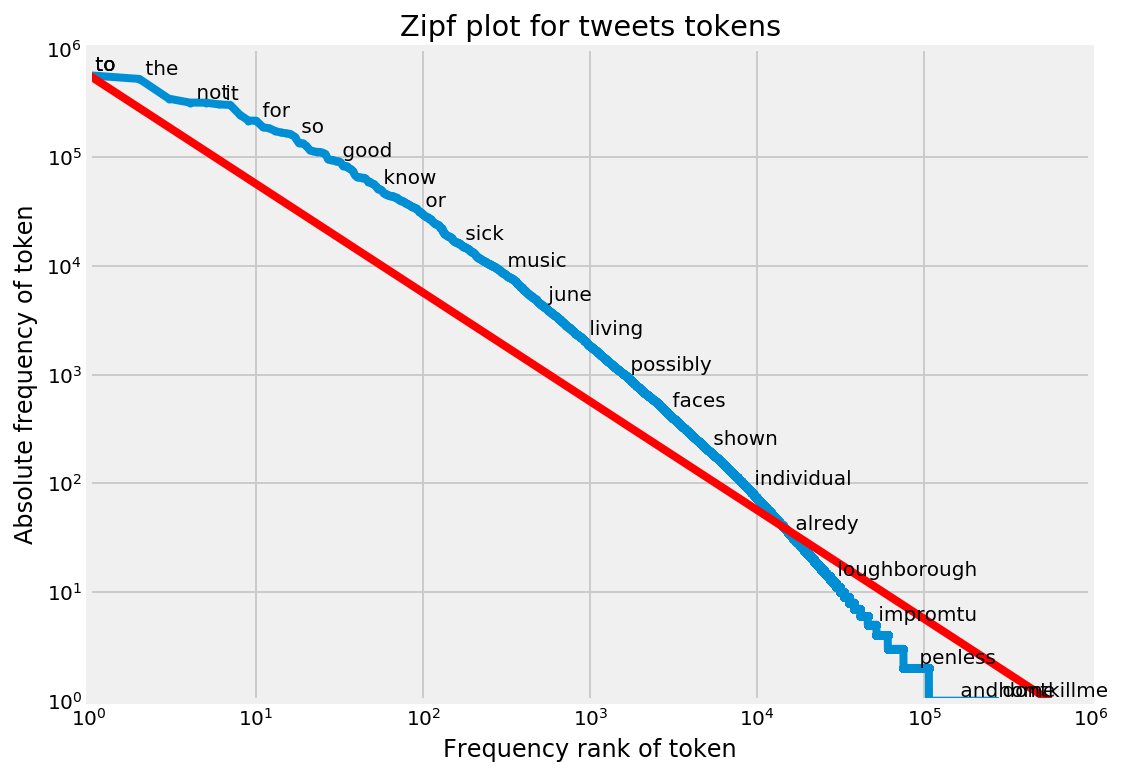

In [74]:
if WorkspaceBasedCheckPt(ChPt+1):
    from pylab import *
    counts = TermFreq_DF.TotalFreq
    tokens = TermFreq_DF.index
    ranks = arange(1, len(counts)+1)
    indices = argsort(-counts)
    frequencies = counts[indices]
    plt.figure(figsize=(8,6))
    plt.ylim(1,10**6)
    plt.xlim(1,10**6)
    loglog(ranks, frequencies, marker=".")
    plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
    title("Zipf plot for tweets tokens")
    xlabel("Frequency rank of token")
    ylabel("Absolute frequency of token")
    grid(True)
    for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
        dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                     verticalalignment="bottom",
                     horizontalalignment="left")

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 3 Reached</b><a class="anchor" id="check3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [75]:
%reset
ChPt = 3

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
## Nope, It is because of the above cell/code used in plotting the above plot
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 4

In [ ]:
%whos

### 5.4. Tokens Frequency Visualisation

This Time Removing stopwords and limiting the max_features

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.feature_extraction.text import CountVectorizer
    CntVec = CountVectorizer(stop_words='english',max_features=10000)
    CntVec.fit(train_DF['clean_text'])

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(len(CntVec.get_feature_names()))

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    NegativeDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0])
    PositiveDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1])
    print(type(NegativeDoc_matrix), NegativeDoc_matrix.shape)

    Negative_tf = np.sum(NegativeDoc_matrix,axis=0)
    Positive_tf = np.sum(PositiveDoc_matrix,axis=0)
    print(type(Negative_tf), Negative_tf.shape)

    Negative = np.squeeze(np.asarray(Negative_tf))
    Positive = np.squeeze(np.asarray(Positive_tf))
    print(type(Negative), Negative.shape)

    TermFreq_DF2 = pd.DataFrame([Negative,Positive], columns=CntVec.get_feature_names()).transpose()
    print(type(TermFreq_DF2), TermFreq_DF.shape)

    TermFreq_DF2.rename(columns = {0:'Negative', 1:'Positive'}, inplace= True)
    TermFreq_DF2['TotalFreq'] = TermFreq_DF2['Negative'] + TermFreq_DF2['Positive']
    print('DataFrame Shape:', TermFreq_DF2.shape)
    display(TermFreq_DF2.sort_values(by='TotalFreq', ascending=False).head(15))

In [ ]:
TermFreq_DF2.sort_values(by='TotalFreq', ascending=False).head(15)

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    TopRanksToView = 50
    Rank = np.arange(TopRanksToView)
    plt.figure(figsize=(14,7))
    DataToUse = TermFreq_DF2.sort_values(by='Negative', ascending=False)['Negative'][:TopRanksToView]
    plt.bar(Rank, DataToUse, align='center', alpha=0.8, color = 'red')
    plt.xticks(Rank, DataToUse.index,rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top {} Negative tokens'.format(TopRanksToView))
    plt.title('Top {} tokens in Negative tweets'.format(TopRanksToView))
    plt.show()

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    TopRanksToView = 50
    Rank = np.arange(TopRanksToView)
    plt.figure(figsize=(14,7))
    DataToUse = TermFreq_DF2.sort_values(by='Positive', ascending=False)['Positive'][:TopRanksToView]
    plt.bar(Rank, DataToUse, align='center', alpha=0.8, color = 'green')
    plt.xticks(Rank, DataToUse.index,rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top {} Positive tokens'.format(TopRanksToView))
    plt.title('Top {} tokens in Positive tweets'.format(TopRanksToView))
    plt.show()

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    import seaborn as sns
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative", y="Positive",fit_reg=False, scatter_kws={'alpha':0.5}, data= TermFreq_DF2)
    plt.ylabel('Positive Frequency')
    plt.xlabel('Negative Frequency')
    plt.title('Negative Frequency vs Positive Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    output_notebook()

    p = figure(x_axis_label='Negative', y_axis_label='Positive', plot_width=650, plot_height=400, x_range=(0, 70000), y_range=(0, 65000))
    # p.y_range = Range1d(0, 60000)
    linexy = np.arange(max(TermFreq_DF2.Positive)*2) 
    p.line(linexy, linexy, line_width=2, color = 'black')
    p.circle(x = 'Negative',y = 'Positive', source= TermFreq_DF2.loc[TermFreq_DF2['Positive'] < TermFreq_DF2['Negative']], color = 'red', size=5, alpha=0.6)
    p.circle(x = 'Negative',y = 'Positive', source= TermFreq_DF2.loc[TermFreq_DF2['Positive'] >= TermFreq_DF2['Negative']], color = 'green', size=5, alpha=0.6)

    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)

Most of the words are below 10,000 on both X-axis and Y-axis, and we cannot see a meaningful relation between negative and positive frequency.

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'pos_rate', and as you can see from the calculation of the code, this is defined as $${pos\_rate} = \frac{positive\ frequency} {positive\ frequency + negative\ frequency}$$

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['PositiveRate'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['TotalFreq']
    display(TermFreq_DF2.sort_values(by='PositiveRate', ascending=False).head(10))

Words with highest pos_rate have zero frequency in the negative tweets, but overall frequency of these words are too low to think of it as a guideline for positive tweets.

Another metric is the frequency a words occurs in the class. This is defined as $${pos\_freq\_pct} = \frac {positive\ frequency} {\Sigma positive\ frequency}$$

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['PositiveFreq_pct'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['Positive'].sum()
    display(TermFreq_DF2.sort_values(by='PositiveFreq_pct', ascending=False).head(10))



But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all the pos_freq_pct values are squashed within the range smaller than 0.015. If we average these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.

So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as $${H} = \frac {n}{\sum_{i=1}^{n}\ \frac{1}{x_i}}$$


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from scipy.stats import hmean
    TermFreq_DF2['Positive_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['PositiveRate'], x['PositiveFreq_pct']])
                                                                       if x['PositiveRate'] > 0 and x['PositiveFreq_pct'] > 0
                                                                       else 0), axis=1)
    display(TermFreq_DF2.sort_values(by='Positive_hmean', ascending=False).head(10))



The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn't provide a meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) value of both pos_rate and pos_freq_pct. **CDF can be explained as "distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x".** By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. In the below result of the code, we can see a word "welcome" with pos_rate_normcdf of 0.995625, and pos_freq_pct_normcdf of 0.999354. This means roughly 99.56% of the tokens will take a pos_rate value less than or equal to 0.91535, and 99.99% will take a pos_freq_pct value less than or equal to 0.001521.

Next, we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of how important a word is within the class.


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from scipy.stats import norm
    def normcdf(x):
        return norm.cdf(x, x.mean(), x.std())

    TermFreq_DF2['PositiveRate_normcdf'] = normcdf(TermFreq_DF2['PositiveRate'])
    TermFreq_DF2['PositiveFreq_pct_normcdf'] = normcdf(TermFreq_DF2['PositiveFreq_pct'])
    TermFreq_DF2['Positive_normcdf_hmean'] = hmean([TermFreq_DF2['PositiveRate_normcdf'], TermFreq_DF2['PositiveFreq_pct_normcdf']])
    display(TermFreq_DF2.sort_values(by='Positive_normcdf_hmean', ascending=False).head(10))

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['NegativeRate'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['TotalFreq']
    TermFreq_DF2['NegativeFreq_pct'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['Negative'].sum()
    TermFreq_DF2['Negative_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['NegativeRate'], x['NegativeFreq_pct']])
                                                                       if x['NegativeRate'] > 0 and x['NegativeFreq_pct'] > 0 
                                                                       else 0), axis=1)                                                        
    TermFreq_DF2['NegativeRate_normcdf'] = normcdf(TermFreq_DF2['NegativeRate'])
    TermFreq_DF2['NegativeFreq_pct_normcdf'] = normcdf(TermFreq_DF2['NegativeFreq_pct'])
    TermFreq_DF2['Negative_normcdf_hmean'] = hmean([TermFreq_DF2['NegativeRate_normcdf'], TermFreq_DF2['NegativeFreq_pct_normcdf']])
    display(TermFreq_DF2.sort_values(by='Negative_normcdf_hmean', ascending=False).head(10))

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative_hmean", y="Positive_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
    plt.ylabel('Positive Rate and Frequency Harmonic Mean')
    plt.xlabel('Negative Rate and Frequency Harmonic Mean')
    plt.title('Negative_hmean vs Positive_hmean')

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    output_notebook()

    p = figure(x_axis_label='Negative Rate and Frequency Harmonic Mean', y_axis_label='Positive Rate and Frequency Harmonic Mean', plot_width=650, plot_height=400, x_range=(0, 0.03), y_range=(0, 0.03))
    
    p.line([0,1], [0,1], line_width=2, color = 'black')
    p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] < TermFreq_DF2['Negative_hmean']], color = 'red', size=5, alpha=0.6)
    p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] >= TermFreq_DF2['Negative_hmean']], color = 'green', size=5, alpha=0.6)

    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)
    # from bokeh.plotting import figure
    # from bokeh.io import output_notebook, show
    # from bokeh.models import LinearColorMapper
    # output_notebook()
    # color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_hmean), high=max(TermFreq_DF2.Positive_hmean))
    # p = figure(x_axis_label='Negative_hmean', y_axis_label='Positive_hmean')
    # p.circle('Negative_hmean','Positive_hmean',size=5,alpha=0.3,source= TermFreq_DF2, color={'field': 'Positive_hmean', 'transform': color_mapper})
    # from bokeh.models import HoverTool
    # hover = HoverTool(tooltips=[('token','@index')])
    # p.add_tools(hover)
    # show(p)

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative_normcdf_hmean", y="Positive_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
    plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
    plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
    plt.title('Negative_normcdf_hmean vs Positive_normcdf_hmean')

It seems like the harmonic mean of rate CDF and frequency CDF has created an interesting pattern on the plot. If a data point is near to upper left corner, it is more positive, and if it is closer to the bottom right corner, it is more negative.

It is good that the metric has created some meaningful insight out of frequency, but with text data, showing every token as just a dot is lacking important information on which token each data point represents. With 10,000 points, it is difficult to annotate all of the points on the plot. For this part, I have tried several methods and came to a conclusion that it is not very practical or feasible to directly annotate data points on the plot.

So I took an alternative method of the interactive plot with Bokeh. Bokeh is an interactive visualisation library for Python, which creates graphics in style of D3.js. Bokeh can output the result in HTML format or also within the Jupyter Notebook. And below is the plot created with Bokeh.

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    from bokeh.models import LinearColorMapper
    output_notebook()
    color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_normcdf_hmean), high=max(TermFreq_DF2.Positive_normcdf_hmean))
    p = figure(x_axis_label='Negative_normcdf_hmean', y_axis_label='Positive_normcdf_hmean')
    p.line([0,1], [0,1], line_width=2, color = 'black')
    p.circle('Negative_normcdf_hmean','Positive_normcdf_hmean',size=5,alpha=0.6,source= TermFreq_DF2,color={'field': 'Positive_normcdf_hmean', 'transform': color_mapper})
    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)



With above Bokeh plot, you can see what token each data point represents by hovering over the points. For example, the points in the top left corner show tokens like "thank", "welcome", "congrats", etc. And some of the tokens in bottom right corner are "sad", "hurts", "died", "sore", etc. And the colour of each dot is organised in "Inferno256" colour map in Python, so yellow is the most positive, while black is the most negative, and the colour gradually goes from black to purple to orange to yellow, as it goes from negative to positive.

Depending on which model I will use later for classification of positive and negative tweets, this metric can also come in handy.


<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 4 Reached</b><a class="anchor" id="check4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [ ]:
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 4

In [ ]:
## https://github.com/uqfoundation/dill/issues/155
## https://github.com/uqfoundation/dill/issues/79
## dill.dump

In [ ]:
# xy = %who_ls
# len(xy)

In [ ]:
# %who, %reset_selective regex, %tb, %who_ls

In [ ]:
print("As after checkpoint 2 we haven't transformed data in anyway hence maintaining this new workspace will be a waste of memory. To have just the essential data we are gonna reset our environment and gonna load checkpoint2 workspace.")
%reset

In [ ]:
WorkspaceBasedCheckPt(2, True, {'access':True, 'task': 'load'})

In [ ]:
dill.detect.trace(True)
try:
#     WorkspaceBasedCheckPt(2, True)
    WorkspaceBasedCheckPt(2, True, {'access': True, 'task':'load'})
except:
    print(e.message)

In [ ]:
%whos

In [ ]:
### Load the File 

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;6.  Model Development</b><a class="anchor" id="H6"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;**To classsify text as Positive or Negative** 
  
### 6.1. Dataset Split
Before we can train any model, we first consider how to split the data. Here I chose to split the data into three chunks: train, development, test. I referenced Andrew Ng's "deeplearning.ai" course on how to split the data.

    Train set: The sample of data used for learning
    Development set (Hold-out cross-validation set): The sample of data used to tune the parameters of a classifier, and provide an unbiased evaluation of a model.
    Test set: The sample of data used only to assess the performance of a final model.

The ratio I decided to split my data is 98/1/1, 98% of data as the training set, and 1% for the dev set, and the final 1% for the test set. The rationale behind this ratio comes from the size of my whole data set. The dataset has more than 1.5 million entries. In this case, only 1% of the whole data gives me more than 15,000 entries. This is more than enough to evaluate the model and refine the parameters.

Another approach is splitting the data into only train and test set, and run k-fold cross-validation on the training set, so that you can have an unbiased evaluation of a model. But considering the size of the data, I have decided to use the train set only to train a model, and evaluate on the dev set, so that I can quickly test different algorithms and run this process iteratively.
 

In [ ]:
train_DF.head()


In [ ]:
from sklearn.model_selection import train_test_split

x = train_DF['clean_text']
y = train_DF['sentiment_class']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.02)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_val), (len(x_val[y_val == 0]) / (len(x_val)*1.))*100, (len(x_val[y_val == 1]) / (len(x_val)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test), (len(x_test[y_test == 0]) / (len(x_test)*1.))*100, (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

In [ ]:
DataFrame.append(other, ignore_index=False, verify_integrity=False)

In [ ]:
x_temp.head()

### Baseline

When comparing various machine learning algorithms, baseline provides a point of reference to compare. The most popular baseline is the Zero Rule (ZeroR). ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for other classification methods. As you can see from the above validation set class division, the majority class is negative with 50.40%, which means if a classifier predicts negative for every validation data, it will get 50.40% accuracy.

Another baseline I wanted to compare the validation results with is TextBlob. Textblob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, The package has built-in sentiment classification. This is a so-called out-of-the-box sentiment analysis tool, and in addition to the null accuracy, I will also keep in mind of the accuracy I get from TextBlob sentiment analysis to see how my model is performing.


In [ ]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

In [ ]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print "Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100)
print "-"*80
print "Confusion Matrix\n"
print confusion
print "-"*80
print "Classification Report\n"
print classification_report(y_validation, tbpred)

## Feature Extraction

If we want to use text in machine learning algorithms, we’ll have to convert them to a numerical representation. One of the methods is called bag-of-words approach. The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each document or data entry is represented as numerical vectors based on the vocabulary built from the corpus.

### Count Vectorizer

With count vectorizer, we merely count the appearance of the words in each text. For example, let's say we have 3 documents in a corpus: "I love dogs", "I hate dogs and knitting", "Knitting is my hobby and my passion". If we build vocabulary from these three sentences and represent each document as count vectors, it will look like below pictures.

**title**

But if the size of the corpus gets big, the number of vocabulary gets too big to process. With my 1.5 million tweets, if I build vocabulary without limiting the number of vocabulary, I will have more than 260,000 vocabularies. This means that the shape of training data will be around 1,500,000 x 260,000, this sounds too big to train various different models with. So I decided to limit the number of vocabularies, but I also wanted to see how the performance varies depending on the number of vocabularies.

Another thing I wanted to explore is stopwords. Stop Words are words which do not contain important significance, such as "the", "of", etc. It is often assumed that removing stopwords is a necessary step, and will improve the model performance. But I wanted to see for myself if this is really the case. So I ran the same test with and without stop words and compared the result. In addition, I also defined my custom stopwords list, which contains top 10 most frequent words in the corpus: "to", "the", "my", "it", "and", "you", "not", "is", "in", "for".

A model I chose to evaluate different count vectors is the logistic regression. It is one of the linear models, so computationally scalable to big data, compared to models like KNN or random forest. And once I have the optimal number of features and make a decision on whether to remove stop words or not, then I will try different models with the chosen number of vocabularies' count vectors.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

Below I define two functions to iteratively train on a different number of features, then check the accuracy of logistic regression on the validation set.

In [ ]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

In [ ]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

#### Unigram

In [ ]:
%%time
print "RESULT FOR UNIGRAM WITHOUT STOP WORDS\n"
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

In [ ]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS\n"
feature_result_ug = nfeature_accuracy_checker(

In [ ]:
csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

In [ ]:
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

In [ ]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [ ]:
%%time
print "RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n"
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

In [ ]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

By looking at the evaluation result, removing stop words did not improve the model performance, but keeping the stop words yielded better performance. I wouldn't say that removing stopwords are not helping the model performance every time, but as empirical findings, in this particular setting, keeping the stop words improve the model performance.

### Bigram
According to Wikipedia, "n-gram is a contiguous sequence of n items from a given sequence of text or speech". In other words, n-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text. Below picture represents well how n-grams are constructed out of source text.

In this project, I will extend the bag-of-words to trigrams, and see if it affects the performance.

In [ ]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS\n"
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

### Trigram

In [ ]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS\n"
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

Now let's visualise the results we got from unigram, bigram, and trigram.

In [ ]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()



The best validation set accuracy for each n-gram is as below.

    unigram: 80,000 & 90,000 features at validation accuracy 80.28%
    bigram: 70,000 features at validation accuracy 82.25%
    trigram: 80,000 features at validation accuracy 82.44%

Below I defined another function to take a closer look at best performing number of features with each n-gram. Below function not only reports accuracy but also gives confusion matrix and classification report.


In [ ]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "-"*80
    print "Confusion Matrix\n"
    print confusion
    print "-"*80
    print "Classification Report\n"
    print classification_report(y_test, y_pred, target_names=['negative','positive'])



Before I run the defined function, let me briefly explain about confusion matrix and classification report. In order to evaluate the performance of a model, there are many different metrics that can be used. Below I will talk in case of binary classification, in which the target variable only has two classes to be predicted. In the case of this project, the classes are either "negative" or "positive".

One obvious measure of performance can be accuracy. It is the number of times the model predicted correctly for the class over the number of the whole data set. But in case of classification, this can be broken down further. Below is a representation of confusion matrix.


title

In the above matrix, each row represents the instances in an actual class while each column represents the instances in a predicted class, and it can be also presented swapping rows and columns (column for the actual class, row for predicted class). So the accuracy (ACC) I mentioned above can be expressed as below.
$${ACC} = \frac {True Positive + True Negative}{Positive + Negative} = \frac {True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

When the distribution of the classes in data is well balanced, accuracy can give you a good picture of how the model is performing. But when you have skewed data, for example, one of the class is dominant in your data set, then accuracy might not be enough to evaluate your model. Let's say you have a dataset which contains 80% positive class, and 20% negative class. This means that by predicting every data into the positive class, the model will get 80% accuracy. In this case, you might want to explore further into the confusion matrix and try different evaluation metrics.

There can be 9 different metrics, just from the combination of numbers from confusion matrix, but I will talk about two of them in particular, and another metric which combines these two.

"Precision" (also called Positive Predictive Value) tells you what proportion of data predicted as positive actually is positive. In other words, the proportion of True Positive in the set of all positive predicted data. $${PPV(Precision)} = \frac {True Positive}{True Positive + False Positive}$$

"Recall" (also called Sensitivity, Hit Rate, True Positive Rate) tells you what proportion of data that actually is positive were predicted positive. In other words, the proportion of True Positive in the set of all actual positive data.
$${TPR(Recall)} = \frac {True Positive}{Positive} = \frac {True Positive}{True Positive + False Negative}$$

Below is the image of confusion matrix of cancer diagnose. If you think of "cancer" as positive class, "no cancer" as a negative class, the image explains well how to think of precision and recall in terms of the confusion matrix. title

And finally, the F1 score is the harmonic mean of precision and recall. The harmonic mean is a specific type of average, which is used when dealing with averages of units, like rates and ratios. So by calculating the harmonic mean of the two metrics, it will give you a good idea of how the model is performing both in terms of precision and recall. The formula is as below $${F1} = 2\cdot\frac {Precision\cdot Recall}{Precision + Recall}$$


In [ ]:
%%time
ug_cvec = CountVectorizer(max_features=80000)
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)

In [ ]:
%%time
bg_cvec = CountVectorizer(max_features=70000,ngram_range=(1, 2))
bg_pipeline = Pipeline([
        ('vectorizer', bg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(bg_pipeline, x_train, y_train, x_validation, y_validation)

In [ ]:
%%time
tg_cvec = CountVectorizer(max_features=80000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

From the above classification reports, we can see that model has slightly higher precision in negative class and higher recall in positive class. But this averages out by calculating the F1 score, and for both classes, we get the almost same F1 score for both positive and negative class. There is also a way to visualise the model performance by plotting ROC curve, but I will explain more in detail later.


## TFIDF Vectorizer

TF-IDF is another way to convert textual data to a numeric form and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.

Let's first look at Term Frequency. We have already looked at term frequency above with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let's say we have two documents in total as below.

    I love dogs
    I hate dogs and knitting

Relative term frequency is calculated for each term within each document as below.  
$${TF(t,d)} = \frac {number\ of\ times\ term(t)\ appears\ in\ document(d)}{total\ number\ of\ terms\ in\ document(d)}$$

For example, if we calculate relative term frequency for 'I' in both document 1 and document 2, it will be as below.  
$${TF('I',d1)} = \frac {1}{3} \approx {0.33}$$$${TF('I',d2)} = \frac {1}{5} = {0.2}$$

Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below.
$${IDF(t,D)} = \log \Big(\frac {total\ number\ of\ documents(D)}{number\ of\ documents\ with\ the\ term(t)\ in\ it}\Big)$$

If we calculate inverse document frequency for 'I',
$${IDF('I',D)} = \log \Big(\frac {2}{2}\Big) = {0}$$

Once we have the values for TF and IDF, now we can calculate TFIDF as below.
$${TFIDF(t,d,D)} = {TF(t,d)}\cdot{IDF(t,D)}$$

Following the case of our example, TFIDF for term 'I' in both documents will be as below.
$${TFIDF('I',d1,D)} = {TF('I',d1)}\cdot{IDF('I',D)} = {0.33}\times{0} = {0}$$$${TFIDF('I',d2,D)} = {TF('I',d2)}\cdot{IDF('I',D)} = {0.2}\times{0} = {0}$$

As you can see, the term 'I' appeared equally in both documents, and the TFIDF score is 0, which means the term is not really informative in differentiating documents. The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into a numeric form.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [ ]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

In [ ]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

In [ ]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))



It seems like TFIDF vectorizer is yielding better results when fed to logistic regression. Let's plot the results from count vectorizer together with TFIDF vectorizer.


In [ ]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

From above chart, we can see including bigram and trigram boost the model performance both in count vectorizer and TFIDF vectorizer. And for every case of unigram to trigram, TFIDF yields better results than count vectorizer.

### Algorithms Comparison


The best result I can get with logistic regression was by using TFIDF vectorizer of 100,000 features including up to trigram. With this I will first fit various different models and compare their validation results, then I will build an ensemble (voting) classifier with top 5 models.

I haven't included some of computationally expensive models, such as KNN, random forest, considering the size of data and the scalability of models. And the fine-tuning of models will come after I try some other different vectorisation of textual data.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [ ]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [ ]:
%%time
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

It seems like the voting classifier does no better than the simple logistic regression model. Thus later part, I will try to finetune logistic regression model. But before that, I would like to try another method of sentiment classification.


## Lexical approach

What I have demonstrated above are machine learning approaches to text classification problem, which tries to solve the problem by training classifiers on the labelled data set. Another famous approach to sentiment analysis task is a lexical approach. "In the lexical approach the definition of sentiment is based on the analysis of individual words and/or phrases; emotional dictionaries are often used: emotional lexical items from the dictionary are searched in the text, their sentiment weights are calculated, and some aggregated weight function is applied." http://www.dialog-21.ru/media/1226/blinovpd.pdf

In the previous part, I have calculated harmonic mean of "positive rate CDF" and "positive frequency percent CDF", and these have given me a good representation of positive and negative terms in the corpora. If it successfully filters which terms are important to each class, then this can also be used for prediction in a lexical manner.

So I decided to make a simple predictor, which make use of the harmonic mean value I calculated. Below I go through the term frequency calculation, and the steps to get 'pos_normcdf_hmean', but this time I calculated term frequency only from the train set. (* Since I learned that I don't need to transform sparse matrix to dense matrix for term frequency calculation, I computed the frequency directly from sparse matrix)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

In [ ]:
neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)

In [ ]:
%%time
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

In [ ]:
from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]



The calculation of the positivity score I decided is fairly simple and straightforward. For each word in a document, look it up in the list of 10,000 words I built vocabulary with, and get the corresponding 'pos_normcdf_hmean' value, then for the document calculate the average 'pos_normcdf_hmean' value. If none of the words can be found from the built 10,000 terms, then yields random probability ranging between 0 to 1. And the single value I get for a document is handled as a probability of the document being positive class.

Normally, a lexical approach will take many other aspects into the calculation to refine the prediction result, but I will try a very simple model.


In [ ]:
pos_hmean = term_freq_df2.pos_normcdf_hmean

In [ ]:
pos_hmean['wtf']

In [ ]:
y_val_predicted_proba = []
for t in x_validation:
    hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
    if len(hmean_scores) > 0:
        prob_score = np.mean(hmean_scores)
    else:
        prob_score = np.random.random()
    y_val_predicted_proba.append(prob_score)


In [ ]:
pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation,pred)

The accuracy is not as good as logistic regression with count vectorizer or TFIDF vectorizer, but compared to null accuracy, 25.56% more accurate, and even compared to TextBlob sentiment analysis, my simple custom lexicon model is 15.31% more accurate. This is an impressive result for such a simple calculation and also considering the fact that the 'pos_normcdf_hmean' is calculated only with the training set. This might be useful later for an ensemble classifier.

# Twitter API trial

In [ ]:
import tweepy
import hidden
import sqlite3
from langdetect import detect

In [ ]:
auth = tweepy.OAuthHandler(hidden.consumer_key, hidden.consumer_secret)
auth.set_access_token(hidden.token_key, hidden.token_secret)
api = tweepy.API(auth)

In [ ]:
places = api.geo_search(query="London", granularity="city")

place_id_L = places[0].id
print('London id is: ',place_id_L)

In [ ]:
places = api.geo_search(query="Brighton", granularity="city")

place_id_B = places[0].id
print('Brighton id is: ',place_id_B)

In [ ]:
places = api.geo_search(query="Edinburgh", granularity="city")

place_id_E = places[0].id
print('Edinburgh id is: ',place_id_E)

In [ ]:
maxitems = 10
print "London tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    print tweet.text

In [ ]:
maxitems = 10
print "Brighton tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_B).items(maxitems):
    print tweet.text

In [ ]:
maxitems = 10
print "Edinburgh tweets retrieve testing"
print '---------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_E).items(maxitems):
    print tweet.text

In [ ]:
conn = sqlite3.connect('twitter_testing.sqlite')
cur = conn.cursor()
cur.executescript('''

CREATE TABLE Tweets_London (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    user_id TEXT,
    user_name TEXT,
    user_timezone TEXT,
    user_language TEXT,
    detected_language TEXT,
    tweet_text  TEXT,
    tweet_created TEXT
)
''')

In [ ]:
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    detected = detect(tweet.text)
    cur.execute('''INSERT OR IGNORE INTO Tweets_London (
        user_id, user_name, user_timezone, user_language, detected_language, tweet_text, tweet_created
        ) 
    VALUES ( ?,?,?,?,?,?,? )''', (tweet.user.id,tweet.user.screen_name,tweet.user.time_zone,tweet.user.lang,detected,tweet.text,tweet.created_at))
    conn.commit()

In [ ]:
from_sql = pd.read_sql_query("SELECT * FROM Tweets_London;", conn)

In [ ]:
from_sql

### 3a. Understanding the Imported Dataset <a class="anchor" id="H3a"></a> 
[Go to TOC](#TOC) 

### 3b. Converting Variable to Categorical <a class="anchor" id="H3b"></a> 
[Go to TOC](#TOC)

In [ ]:
## Saving the WorkSpace
# workspace('Save')
workspace('Load')